In [ ]:
# 向量基
# 基（basis）也称为基底，其是用于描述、刻画向量空间的基本工具。向量空间的基是它的一个特殊的子集，基的元素称为基向量。向量空间中任意一个元素，都可以唯一地表示成基向量的线性组合，使用基底可以便利地描述向量空间
# 可认为是坐标系的单位向量(并且模长为 1？)

# 通过向新基进行映射（投影） ==> （新基矩阵） * （向量） = （向量映射）
# 通过增加、减少基，即可实现升维、降维


In [ ]:
# PAC
# 要紧降维、升维，首先要选取合适的基，
# 方差是用来度量单个随机变量的离散程度。也就是说，最大方差给出了数据最重要的信息。
# 一个维度中的方差，可以看作是该维度中每个元素与其均值的差平方和的均值，公式如下：

# 降维：尽量留得更多，最重要的信息
# 找到一个基，通过这个基映射原来的二维数据点，得到一个方差最大的结果，从而完成降维的目的

# 寻找基
# 如果按方差最大一个基一个基的寻找，每次都寻找最合适的基，最终合并进行降维，那么可能会出现局部最优（其中有些基是重合的）

# 基之间应该是没有相关性的
# 在二维空间中两个向量垂直，则线性无关，那么在高维空间中，向量之间相互正交，则线性无关

# 协方差：一般用来刻画两个随机变量的相似程度
# 基于方差公式，改为两个变量
# 方差 == 特殊情况的协方差：从原来衡量两个相同变量的误差，到现在变成了衡量两个不同变量的误差
# 两个变量之间的协方差等于 0 即可以选择到无关的基

# 协方差矩阵
# 为了解决协方差只能处理两个变量的问题，引入协方差矩阵
# 由向量自身的方差与向量之间的协方差构成。这个定义延伸到更多向量时同样受用。
# 选择一组基，使得原始向量通过该基映射到新的维度，同时需要满足使得该向量的方差最大，向量之间的协方差为 0 ，也就是矩阵对角化。

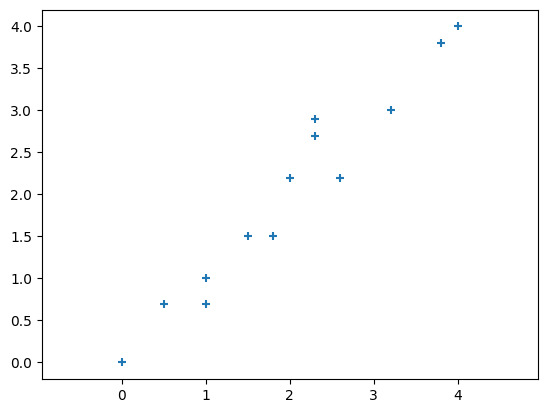

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.array([0, 0.5, 1, 1, 1.5, 1.8, 2, 2.3, 2.3, 2.6, 3.2, 3.8, 4])
y = np.array([0, 0.7, 1, 0.7, 1.5, 1.5, 2.2, 2.9, 2.7, 2.2, 3, 3.8, 4])

arr = np.array([x, y])
plt.axis("equal")
plt.scatter(x, y, marker="+")

In [7]:
base = np.array([np.sqrt(2) / 2, np.sqrt(2) / 2])  # 基向量
base

array([0.70710678, 0.70710678])

In [8]:
result_eye = np.dot(base, arr)
result_eye

array([0.        , 0.84852814, 1.41421356, 1.20208153, 2.12132034,
       2.33345238, 2.96984848, 3.67695526, 3.53553391, 3.39411255,
       4.38406204, 5.37401154, 5.65685425])

In [9]:

covMat = np.cov(arr)  # 计算协方差矩阵
covMat

array([[1.48      , 1.47      ],
       [1.47      , 1.54141026]])

In [10]:
eigVal, eigVec = np.linalg.eig(np.mat(covMat))  # 获得特征值、特征向量
eigVal, eigVec

(array([0.04038448, 2.98102578]),
 matrix([[-0.71445199, -0.69968447],
         [ 0.69968447, -0.71445199]]))

In [11]:
eigValInd = np.argsort(-eigVal)  # 特征值降序排序
bestVec = eigVec[:, eigValInd[:1]]  # 取最好的一个特征向量
bestVec

matrix([[-0.69968447],
        [-0.71445199]])

In [12]:
result_cov = np.dot(arr.T, bestVec)
result_cov

matrix([[ 0.        ],
        [-0.84995863],
        [-1.41413646],
        [-1.19980086],
        [-2.12120469],
        [-2.33111003],
        [-2.97116331],
        [-3.68118505],
        [-3.53829465],
        [-3.39097399],
        [-4.38234627],
        [-5.37371854],
        [-5.65654583]])

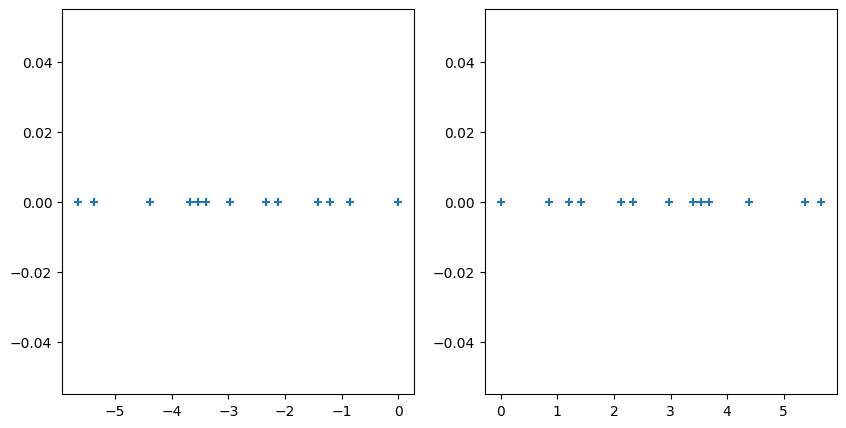

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(result_cov.flatten().A[0], [0 for i in range(len(x))], marker="+")
axes[1].scatter(result_eye, [0 for i in range(len(x))], marker="+")

In [14]:
np.var(result_cov), np.var(result_eye)

(2.7517161001590864, 2.751420118343195)

In [15]:
import pandas as pd

df = pd.read_csv(
    "./pca_data.csv"
)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,0.001956,54.936224,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,0.005396,91.549650,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,0.005396,97.934373,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,0.005396,97.934373,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [16]:
# 零值化处理：去除均值对变换的影响，减去均值后数据的信息量没有变化，即数据的区分度（方差）是不变的
# 不去均值，第一主成分，可能会或多或少的与均值相关
data = df.values
mean = np.mean(data, axis=0)
data = data - mean
data

array([[ 1.64771044e+01,  6.81497692e+01, -1.28140177e+01, ...,
        -8.67361738e-17, -3.29597460e-17, -1.70530257e-13],
       [ 8.13271044e+01, -3.07102308e+01,  2.98748823e+01, ...,
         3.62509579e-03,  7.16666667e-04,  1.08534434e+02],
       [-8.18428956e+01,  6.40897692e+01, -1.41362177e+01, ...,
         3.19250958e-02,  9.51666667e-03, -1.68098663e+01],
       ...,
       [-3.56428956e+01, -1.16070231e+02,  5.75268229e+00, ...,
        -7.87490421e-03, -2.78333333e-03, -5.61469663e+01],
       [-1.19532896e+02,  3.61597692e+01, -2.35140177e+01, ...,
         8.02509579e-03,  2.21666667e-03, -6.17596635e+00],
       [-6.95328956e+01, -4.50902308e+01, -5.10291771e+00, ...,
        -2.74904215e-04, -7.83333333e-04,  3.81143337e+01]])

In [17]:
# 协方差矩阵
covMat = np.cov(data, rowvar=False)
covMat

array([[ 5.39940056e+03, -8.47962623e+02,  1.02671010e+01, ...,
        -1.67440688e-02, -5.93197815e-03,  2.87879850e+01],
       [-8.47962623e+02,  6.43649877e+03,  1.35942679e+01, ...,
         1.21967287e-02,  2.32652705e-03,  3.37335304e+02],
       [ 1.02671010e+01,  1.35942679e+01,  8.63239193e+02, ...,
        -7.59126039e-03, -2.59521865e-03, -9.07023669e+01],
       ...,
       [-1.67440688e-02,  1.21967287e-02, -7.59126039e-03, ...,
         7.75231441e-05,  2.45865358e-05,  3.22979001e-01],
       [-5.93197815e-03,  2.32652705e-03, -2.59521865e-03, ...,
         2.45865358e-05,  8.21484994e-06,  1.04706789e-01],
       [ 2.87879850e+01,  3.37335304e+02, -9.07023669e+01, ...,
         3.22979001e-01,  1.04706789e-01,  8.81006310e+03]])

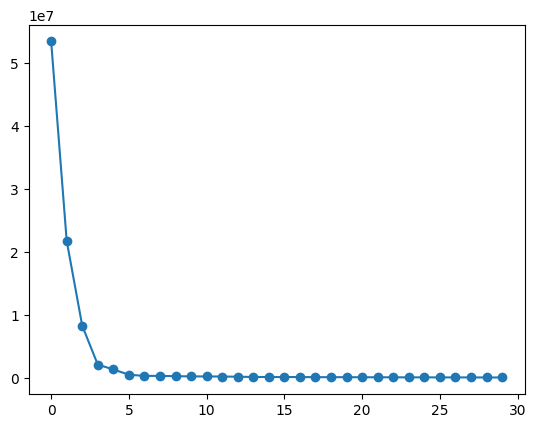

In [18]:
# 分解协方差矩阵获得特征值与特征向量，同时绘制出前 30 个特征值变化曲线图
# 方差的急剧下降，到后面绝大多数的主成分所占方差几乎为 0，因此更说明了对该数据进行主成分分析的必要性。其中，第 4 个点是比较明显的拐点
eigVal, eigVec = np.linalg.eig(np.mat(covMat))
plt.plot(eigVal[:30], marker="o")

In [19]:
sum(eigVal[:4]), sum(eigVal) * 0.9
# 590 个主成分中，前 4 个主成分所占的方差就已经超过了 90%。说明后 586 个主成分仅占 10% ，即仅用前 4 个特征向量来映射数据，就可以保留绝大多数的原始数据信息

(85484127.236119, 81131452.77696116)

In [20]:
eigValInd = np.argsort(-eigVal)  # 特征值降序排序
bestVec = eigVec[:, eigValInd[:4]]  # 取最好的 4 个特征向量
bestVec

matrix([[-6.39070760e-04, -1.20314234e-04,  1.22460363e-04,
         -2.72221201e-03],
        [ 2.35722934e-05, -6.60163227e-04,  1.71369126e-03,
          2.04941860e-04],
        [ 2.36801459e-04,  1.58026311e-04,  3.28185512e-04,
          4.20363040e-04],
        ...,
        [ 2.61329351e-08, -6.06233975e-09,  1.09328336e-09,
          2.66843972e-07],
        [ 5.62597732e-09,  5.96647587e-09,  8.83024927e-09,
          5.91392106e-08],
        [ 3.89298443e-04, -2.32070657e-04,  7.13534990e-04,
         -1.42694472e-03]])

In [21]:
np.dot(data, bestVec)

matrix([[5183.89616507, 3022.64772377, -688.38624272,   57.92893142],
        [1866.69728394, 4021.63902468, 1505.57352582,  199.23992427],
        [3154.74165413, 3461.98581552, 1855.44207771, -153.33360802],
        ...,
        [3821.21714302,  157.30328822, 1198.46485098,  -15.13555733],
        [4271.04023715, 1300.47276359, -381.63452019,  298.64738407],
        [3562.87329382, 3727.60719872,  418.43547367,  -35.86509797]])

In [22]:
# 使用 sklearn.decomposition.PCA 进行处理
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit_transform(data)

array([[-5183.89616507, -3022.64772377,   688.38624272,    57.92893134],
       [-1866.69728394, -4021.63902468, -1505.57352582,   199.23992422],
       [-3154.74165413, -3461.98581552, -1855.44207771,  -153.33360808],
       ...,
       [-3821.21714302,  -157.30328822, -1198.46485098,   -15.13555738],
       [-4271.04023715, -1300.47276359,   381.63452019,   298.64738404],
       [-3562.87329382, -3727.60719872,  -418.43547367,   -35.8650981 ]])